# About Dataset
This dataset comes from a mobile game based in Asia and includes data such as the amount spent by players per gacha draw, the number of draws, the number of wins, and the value of the obtained prizes.

Spending and value have been converted to the same currency value.

# Questions
Q1. Which players do you think are lucky? Why?

Q2. There is a marketing budget available now. Which group of players would you invest it in? Why?

Q3. What do you think the overall market trend is?

Q4. What else do you see in the data? Do you have any suggestions?

In [1390]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter
pd.options.display.float_format = '{:,.2f}'.format


In [1391]:
df = pd.read_csv('game_insight_data.csv')


In [1392]:
df

,Date,Account,Currency,Gacha Attempts,Wins,Win Rate,Amount Spent,Total Accumulated Treasure Value
0,2022/4/21,9B4A3C3069,CNY,45,25,55.56%,8299,4507
1,2022/11/1,527FA2C4FA,TWD,1657,691,41.70%,159082,50695
2,2022/12/27,52634EC827,TWD,1,1,100.00%,55,21
3,2022/11/25,C27DDD5E1C,CNY,5,1,20.00%,150,7
4,2022/8/25,580D884F36,KRW,14,5,35.71%,22220,5999
...,...,...,...,...,...,...,...,...
90381,2023/5/16,ACF1D8D0A4,CNY,9,3,33.33%,7270,2556
90382,2023/6/21,8D9A01A69A,JPY,55,16,29.09%,3720,573
90383,2023/6/11,10E41B1956,KRW,1,0,0.00%,40,0
90384,2023/1/12,E20D333E32,KRW,24,13,54.17%,13620,5804


In [1393]:
df.shape

(90386, 8)

In [1394]:
df.describe(include='all')

,Date,Account,Currency,Gacha Attempts,Wins,Win Rate,Amount Spent,Total Accumulated Treasure Value
count,90386,90386,90386,"90,386.00","90,386.00",90386,"90,386.00","90,386.00"
unique,546,6812,5,NaN,NaN,3632,NaN,NaN
top,2022/12/21,C253BF126A,CNY,NaN,NaN,0.00%,NaN,NaN
freq,543,498,19232,NaN,NaN,11403,NaN,NaN
mean,NaN,NaN,NaN,73.77,31.73,NaN,"42,243.13","18,085.35"
std,NaN,NaN,NaN,168.97,70.59,NaN,"215,752.38","97,720.23"
min,NaN,NaN,NaN,1.00,0.00,NaN,30.00,0.00
25%,NaN,NaN,NaN,5.00,2.00,NaN,608.25,103.00
50%,NaN,NaN,NaN,20.00,8.00,NaN,"3,840.00","1,156.00"
75%,NaN,NaN,NaN,69.00,31.00,NaN,"19,312.50","7,233.75"


In [1395]:
df.columns.tolist()

['Date',
 'Account',
 'Currency',
 'Gacha Attempts',
 'Wins',
 'Win Rate',
 'Amount Spent',
 'Total Accumulated Treasure Value']

In [1396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90386 entries, 0 to 90385
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Date                              90386 non-null  object
 1   Account                           90386 non-null  object
 2   Currency                          90386 non-null  object
 3   Gacha Attempts                    90386 non-null  int64 
 4   Wins                              90386 non-null  int64 
 5   Win Rate                          90386 non-null  object
 6   Amount Spent                      90386 non-null  int64 
 7   Total Accumulated Treasure Value  90386 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 5.5+ MB


In [1397]:
df.isnull().sum()

Date                                0
Account                             0
Currency                            0
Gacha Attempts                      0
Wins                                0
Win Rate                            0
Amount Spent                        0
Total Accumulated Treasure Value    0
dtype: int64

In [1398]:
df['Currency'].value_counts()

Currency
CNY    19232
TWD    19007
KRW    18965
HKD    17300
JPY    15882
Name: count, dtype: int64

# Q1. Which players do you think are lucky? Why?
I assume the players who have won the most treasure value by the lowest spend are lucky.

In [1399]:
summary = df.groupby('Account').agg({
    'Amount Spent' : 'sum', 
    'Total Accumulated Treasure Value' : 'sum'
    }).reset_index()
summary['ROI'] = summary['Total Accumulated Treasure Value'] / summary['Amount Spent']
summary = summary.sort_values(by=['ROI', 'Amount Spent'], ascending=[False, True])
summary.head()



,Account,Amount Spent,Total Accumulated Treasure Value,ROI
959,23C53C86F2,30,1739,57.97
1380,3380BD2D8C,30,173,5.77
1493,37AE9B3BF8,30,173,5.77
751,1C52C8D665,60,239,3.98
6049,E3622AEC3A,60,239,3.98


After aggregating each account's spending and prize amounts to calculate their ROI, we discovered that account '23C53C86F2' has an astonishingly high ROI, indicating that this account is incredibly lucky. However, due to the extreme nature of this data point, I must remove it before proceeding with further analysis.

In [1400]:
summary = summary[summary['Account'] != '23C53C86F2']
summary.head()

,Account,Amount Spent,Total Accumulated Treasure Value,ROI
1380,3380BD2D8C,30,173,5.77
1493,37AE9B3BF8,30,173,5.77
751,1C52C8D665,60,239,3.98
6049,E3622AEC3A,60,239,3.98
4268,9ED32AEE62,90,239,2.66


In [1401]:
summary.describe()

,Amount Spent,Total Accumulated Treasure Value,ROI
count,"6,811.00","6,811.00","6,811.00"
mean,"560,591.39","240,003.04",0.27
std,"5,595,276.55","2,458,643.65",0.21
min,30.00,0.00,0.00
25%,360.00,52.00,0.14
50%,"3,220.00",795.00,0.27
75%,"34,255.00","11,908.00",0.38
max,"205,852,962.00","88,019,130.00",5.77


In [1402]:
roi_threshold = summary['ROI'].quantile(0.75)
high_roi = summary[summary['ROI'] > roi_threshold]
high_roi.shape[0]

1703

In [1403]:
spent_mean = summary['Amount Spent'].quantile(0.25)
filtered_accounts = summary[(summary['Amount Spent'] <= spent_mean) & 
                            (summary['ROI'] >= roi_threshold)]
filtered_accounts.shape[0]

194

In [1404]:
filtered_accounts.describe()

,Amount Spent,Total Accumulated Treasure Value,ROI
count,194.00,194.00,194.00
mean,121.46,85.41,0.76
std,98.13,85.15,0.68
min,30.00,20.00,0.38
25%,30.00,21.00,0.54
50%,90.00,43.00,0.67
75%,207.50,121.25,0.70
max,360.00,469.00,5.77


In [1405]:
filtered_accounts

,Account,Amount Spent,Total Accumulated Treasure Value,ROI
1380,3380BD2D8C,30,173,5.77
1493,37AE9B3BF8,30,173,5.77
751,1C52C8D665,60,239,3.98
6049,E3622AEC3A,60,239,3.98
4268,9ED32AEE62,90,239,2.66
...,...,...,...,...
802,1E2D1E0D12,110,43,0.39
1060,27C3EF002D,110,43,0.39
1711,3EE21CD09A,320,123,0.38
4625,AC47D45FE3,55,21,0.38


We can see that when the ROI exceeds 0.27, players have outperformed 50% of others. By setting the criteria as the top 25% highest ROI (above 0.38) and the top 25% lowest spending (under $360), we can identify these 194 accounts, plus account '23C53C86F2,' making a total of 195 extremely lucky players.

# Q2. There is a marketing budget available now. Which group of players would you invest it in? Why?

In [1406]:
currency_data = df.groupby('Currency').agg({
    'Account' : 'count',
    'Amount Spent' : 'sum',
    'Gacha Attempts' : 'sum',
    }).reset_index()
currency_data['Avg.Gacha Spent'] = currency_data['Amount Spent'] / currency_data['Gacha Attempts']
currency_data = currency_data.sort_values(by='Amount Spent', ascending=False)
currency_data

,Currency,Account,Amount Spent,Gacha Attempts,Avg.Gacha Spent
4,TWD,19007,1013428100,1284399,789.03
2,JPY,15882,797378892,1339949,595.08
3,KRW,18965,739166677,1389461,531.98
1,HKD,17300,683509200,1175064,581.68
0,CNY,19232,584705127,1478656,395.43


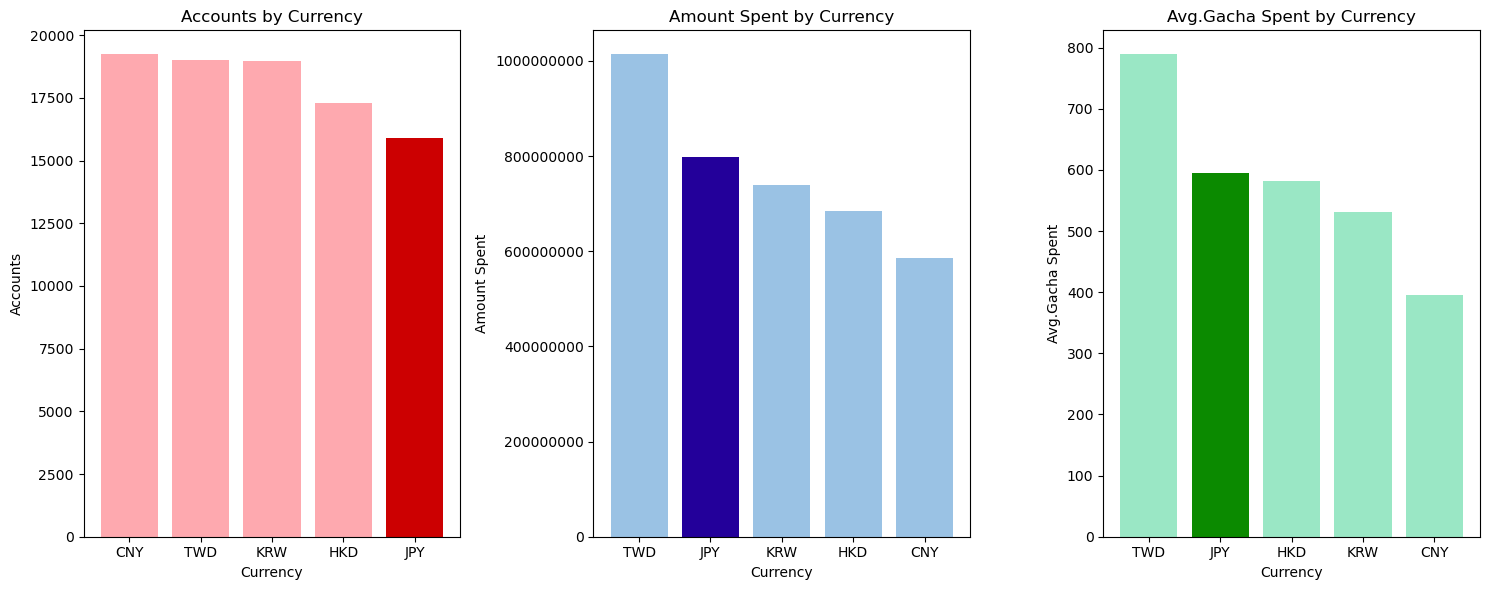

In [1407]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

# 1. Accounts by Currency
currency_data_sorted_account = currency_data.sort_values(by='Account', ascending=False)
colors = ['#cc0001' if currency == 'JPY' else '#fea9af' for currency in currency_data_sorted_account['Currency']]
axes[0].bar(currency_data_sorted_account['Currency'], currency_data_sorted_account['Account'], color=colors)
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_title('Accounts by Currency')
axes[0].set_xlabel('Currency')
axes[0].set_ylabel('Accounts')

# 2. Amount Spent by Currency
currency_data_sorted_amount = currency_data.sort_values(by='Amount Spent', ascending=False)
colors = ['#23009a' if currency == 'JPY' else '#9ac2e4' for currency in currency_data_sorted_amount['Currency']]
axes[1].bar(currency_data_sorted_amount['Currency'], currency_data_sorted_amount['Amount Spent'], color=colors)
axes[1].ticklabel_format(style='plain', axis='y')
axes[1].set_title('Amount Spent by Currency')
axes[1].set_xlabel('Currency')
axes[1].set_ylabel('Amount Spent')

# 3. Avg. Gacha Spent by Currency
currency_data_sorted_avg = currency_data.sort_values(by='Avg.Gacha Spent', ascending=False)
colors = ['#0b8a00' if currency == 'JPY' else '#9ae7c5' for currency in currency_data_sorted_avg['Currency']]
axes[2].bar(currency_data_sorted_avg['Currency'], currency_data_sorted_avg['Avg.Gacha Spent'], color=colors)
axes[2].ticklabel_format(style='plain', axis='y')
axes[2].set_title('Avg.Gacha Spent by Currency')
axes[2].set_xlabel('Currency')
axes[2].set_ylabel('Avg.Gacha Spent')

# 顯示圖形
plt.tight_layout()
plt.show()


I will allocate the budget to the Japan market because the number of accounts in JPY is the lowest among the four regions. However, in terms of total spending and average spending per gacha attempt, it ranks second. Therefore, I estimate that the growth potential of this market is greater than that of the other regions.

# Q3. What do you think the overall market trend is?

In [1408]:
def format_y_axis(x, pos):
    return f'{int(x):,}'

In [1409]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d', errors='coerce')
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)

group_by_quarter = df.groupby(['Quarter', 'Currency']).agg({
    'Account': 'count',
    'Amount Spent': ['sum', 'median', 'mean'],  
    'Gacha Attempts': ['sum', 'median', 'mean'],  
}).reset_index()

group_by_quarter.columns = ['Quarter', 'Currency', 
                            'Account',
                            'Amount_Spent_Sum', 'Amount_Spent_Median', 'Amount_Spent_Mean',
                            'Gacha_Attempts_Sum', 'Gacha_Attempts_Median', 'Gacha_Attempts_Mean']

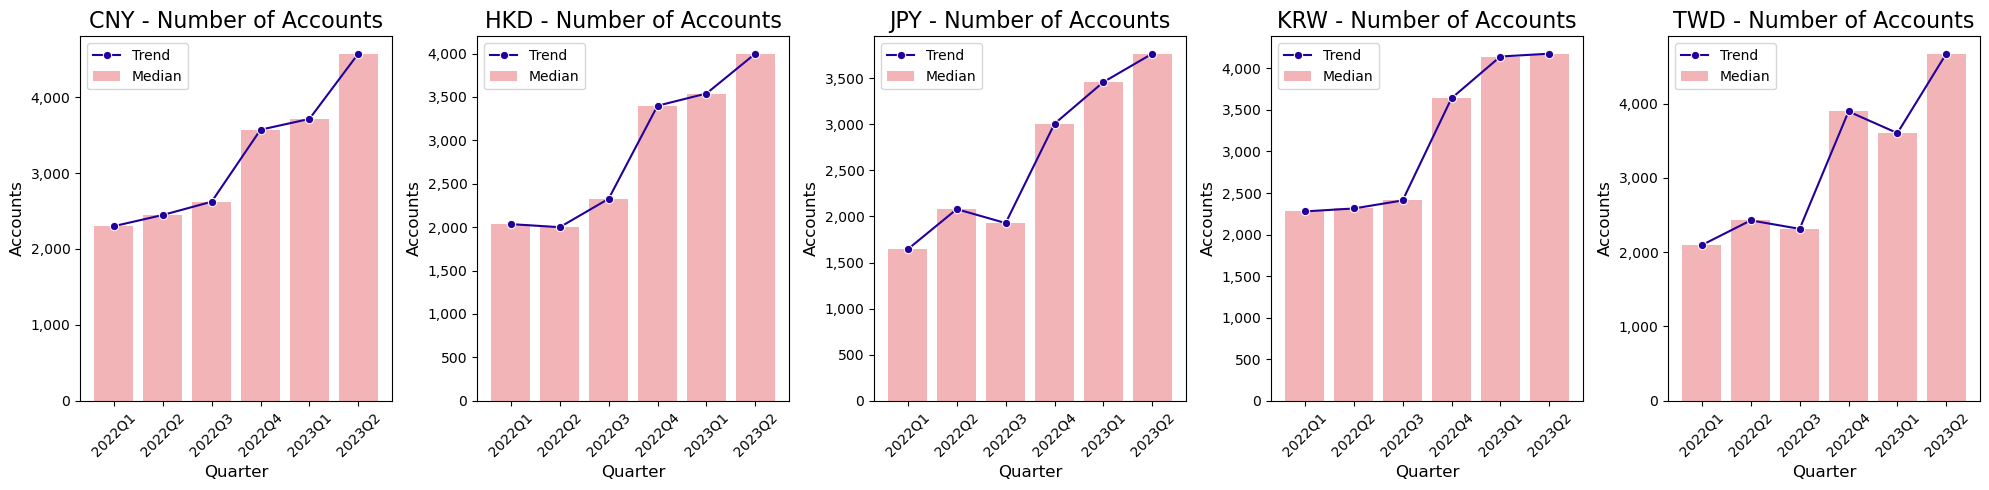

In [1410]:
currencies = group_by_quarter['Currency'].unique()
fig, axes = plt.subplots(ncols=len(currencies), figsize=(20, len(currencies)), sharex=True)

for i, currency in enumerate(currencies):
    ax = axes[i]
    data = group_by_quarter[group_by_quarter['Currency'] == currency]
    
    sns.barplot(data=data, 
                x='Quarter', 
                y='Account', 
                color='#fea9af', 
                ax=ax, 
                label='Median')
    sns.lineplot(data=data, 
                 x='Quarter', 
                 y='Account', 
                 color='#23009a', 
                 marker='o', ax=ax, 
                 label='Trend')
    
    ax.set_title(f'{currency} - Number of Accounts', fontsize=16)
    ax.set_ylabel('Accounts', fontsize=12)
    ax.set_xlabel('Quarter', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

The number of accounts in each market grew during Q4 of 2022.

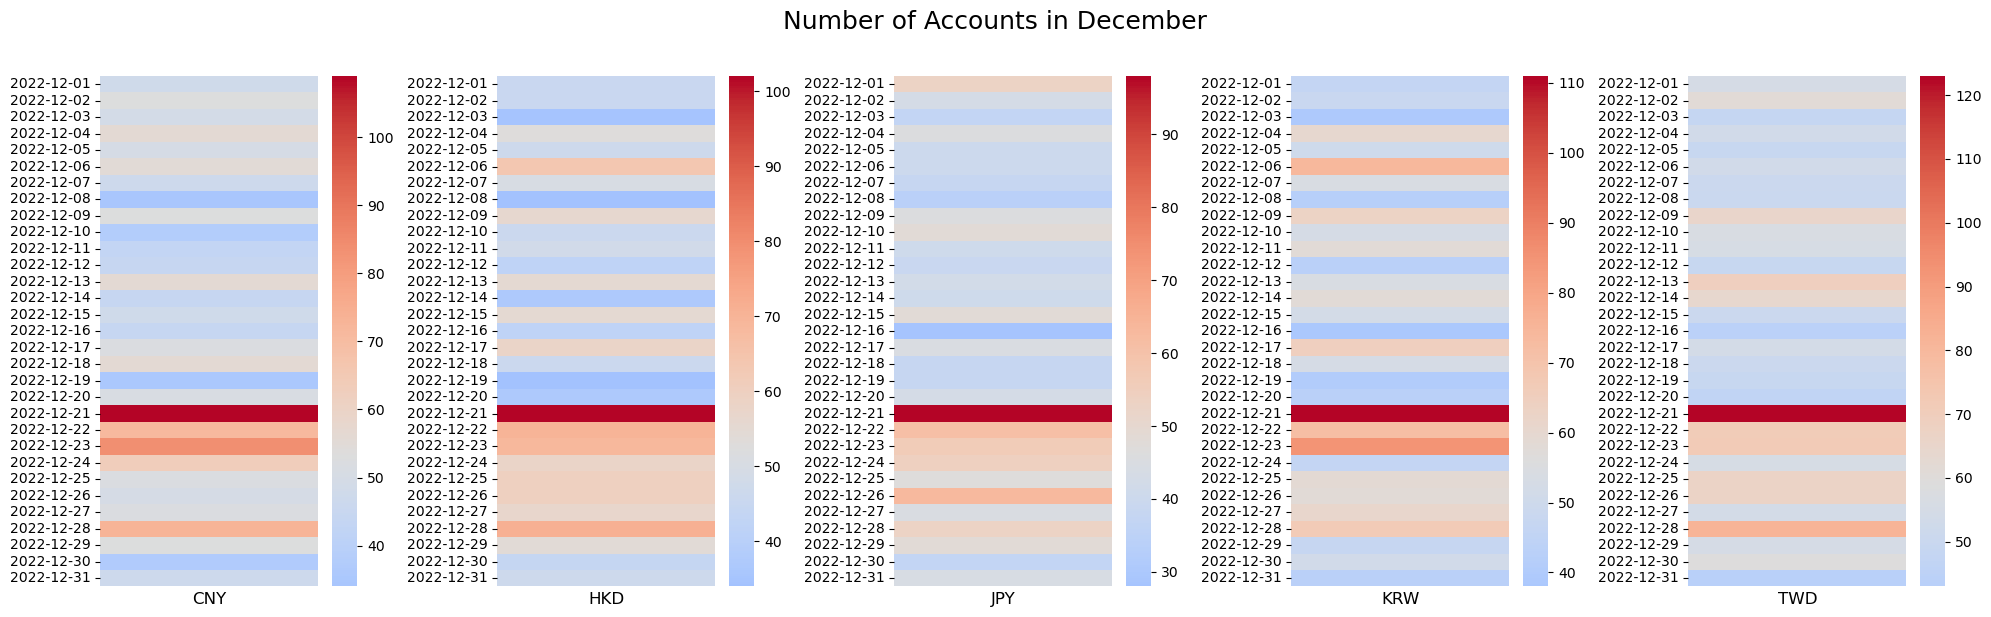

In [1411]:
group_by_date['Date'] = pd.to_datetime(group_by_date['Date']).dt.date

currencies = group_by_date['Currency'].unique()
fig, axes = plt.subplots(ncols=len(currencies), figsize=(20, 6), sharex=True)

for i, currency in enumerate(currencies):
    ax = axes[i]
    data = group_by_date[group_by_date['Currency'] == currency]

    pivot_data = data.pivot_table(index='Date', values='Account')
    
    pivot_data.index = pd.to_datetime(pivot_data.index, errors='coerce')
    
    sns.heatmap(
        pivot_data, 
        cmap='coolwarm', 
        annot=False, 
        fmt=".1f", 
        center=pivot_data.mean().mean(), 
        ax=ax, 
        cbar_kws={"format": '%.0f'},
        xticklabels=False
    )
    
    ax.set_ylabel('')
    formatted_dates = pivot_data.index.strftime('%Y-%m-%d') 
    ax.set_yticklabels(formatted_dates, fontsize=10)

    ax.set_xlabel(currency, fontsize=12)

plt.suptitle('Number of Accounts in December', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()




Upon closely examining the number of accounts in December 2022, it was found that a promotional campaign might have been launched on December 21, further driving the growth in account numbers during the quarter.

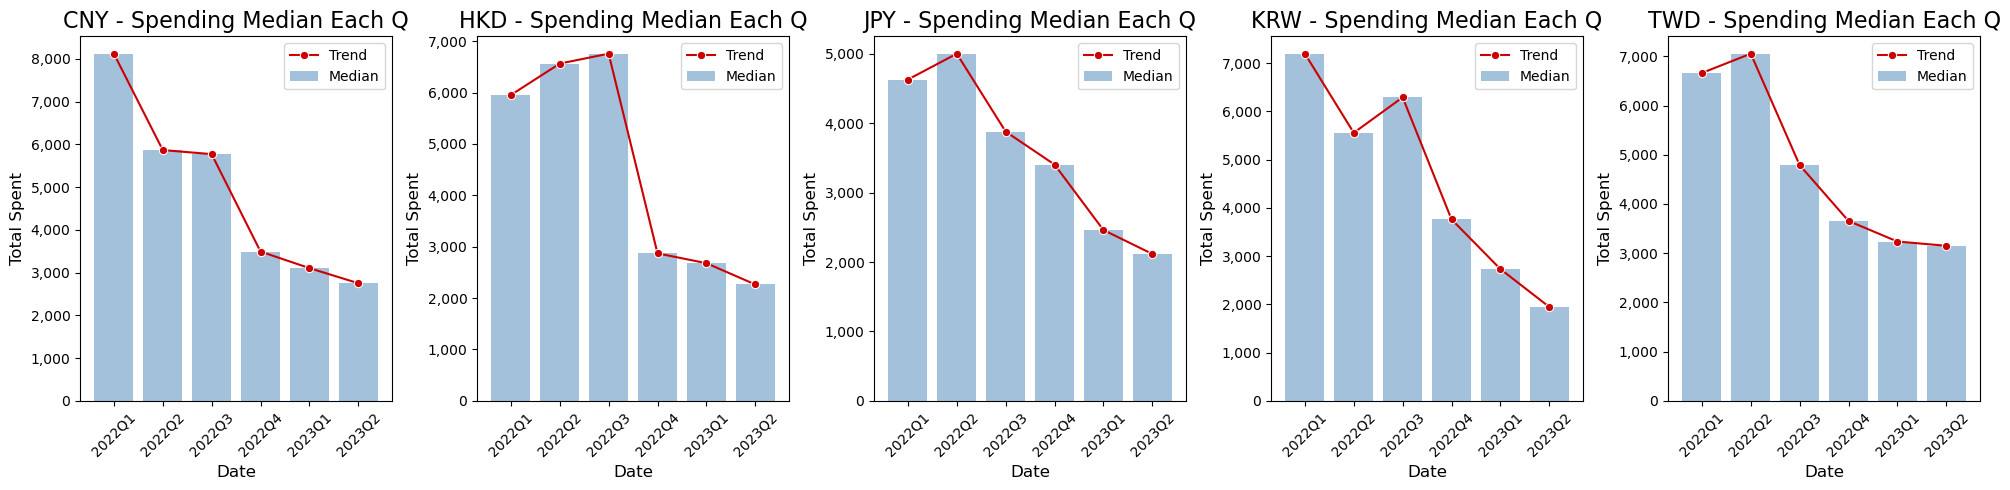

In [1412]:
currencies = group_by_quarter['Currency'].unique()
fig, axes = plt.subplots(ncols=len(currencies), figsize=(20, len(currencies)), sharex=True)

for i, currency in enumerate(currencies):
    ax = axes[i]
    data = group_by_quarter[group_by_quarter['Currency'] == currency]
    
    sns.barplot(data=data, x='Quarter', 
                y='Amount_Spent_Median', 
                color='#9ac2e4', 
                ax=ax, 
                label='Median')
    sns.lineplot(data=data, x='Quarter', 
                 y='Amount_Spent_Median', 
                 color='#cc0001', 
                 marker='o', 
                 ax=ax, 
                 label='Trend')
    
    ax.set_title(f'{currency} - Spending Median Each Q', fontsize=16)
    ax.set_ylabel('Total Spent', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(FuncFormatter(format_y_axis))
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


At the same time, it is also observed that the median amount spent on each gacha has significantly decreased, indicating that new players are more inclined to use smaller amounts for the draws.

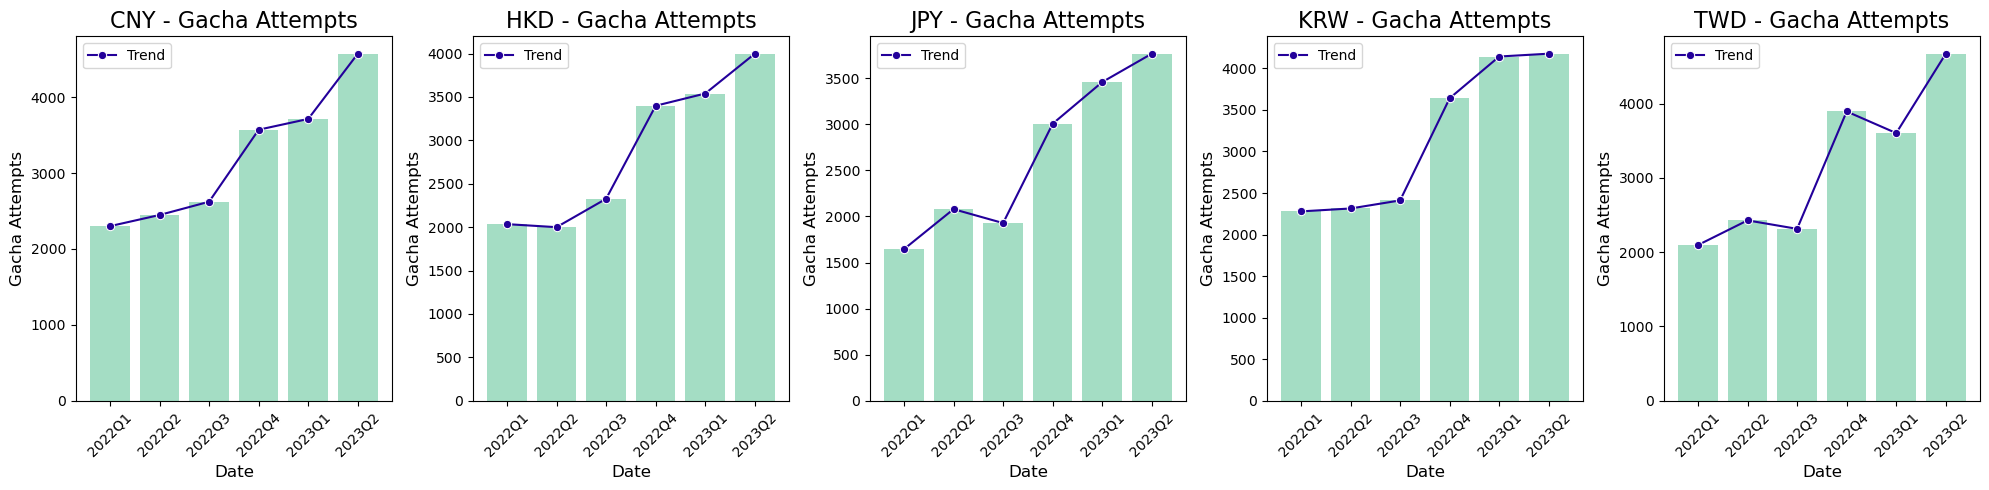

In [1413]:
fig, axes = plt.subplots(ncols=len(currencies), figsize=(20, len(currencies)), sharex=True)
for i, currency in enumerate(currencies):
    ax = axes[i]
    data = group_by_quarter[group_by_quarter['Currency'] == currency]
    sns.barplot(data=data, 
                x='Quarter', 
                y='Account', 
                color='#9ae7c5', 
                ax=ax)
    sns.lineplot(data=data, 
                 x='Quarter', 
                 y='Account', 
                 color='#23009a', 
                 marker='o', 
                 ax=ax, 
                 label='Trend')
    ax.set_title(f'{currency} - Gacha Attempts', fontsize=16)
    ax.set_ylabel('Gacha Attempts', fontsize=12)
    ax.set_xlabel('Date', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# 調整圖表間距
plt.tight_layout()
plt.show()

Based on current market trends, players tend to spend smaller amounts on gacha pulls. This phenomenon may be attributed to the promotional events in December that attracted a group of new players. They may still be in the trial phase or have not yet found the game experience satisfying enough to encourage larger financial commitments. Therefore, improving the game experience to increase the willingness of new players to invest more becomes a major challenge. For instance, designing new game characters could potentially bring more appeal to the gacha pulls.

# Q4. What else do you see in the data? Do you have any suggestions?

In [1426]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d', errors='coerce')
df['Month'] = df['Date'].dt.to_period('M').astype(str)

group_by_month = df.groupby(['Month', 'Currency']).agg({
    'Gacha Attempts': 'sum',
    'Amount Spent': 'sum',
    'Wins': 'sum',
    'Total Accumulated Treasure Value': 'sum'
}).reset_index()

group_by_month['Win Rate'] = group_by_month['Wins'] / group_by_month['Gacha Attempts']
group_by_month['ROI'] = group_by_month['Total Accumulated Treasure Value'] / group_by_month['Amount Spent']


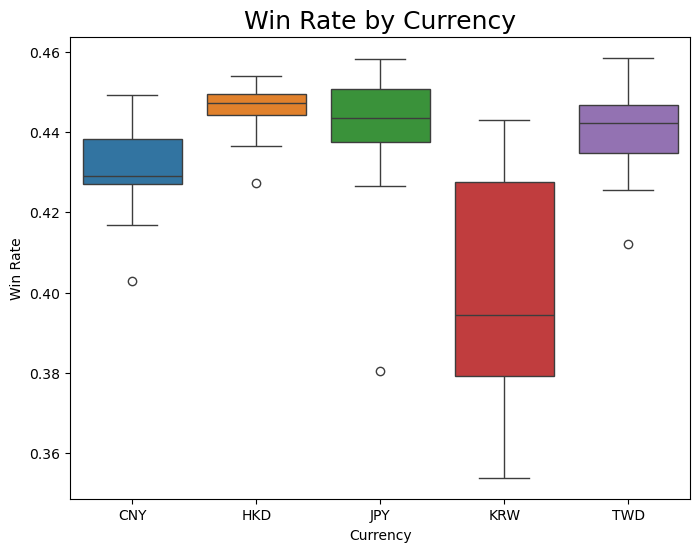

In [1427]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Currency',
              y = 'Win Rate', 
              data = group_by_month,
              hue = 'Currency')
plt.title('Win Rate by Currency', fontsize=18)
plt.xlabel('Currency')
plt.ylabel('Win Rate')
plt.show()	

## Market Insights: Korean Gacha Experience
1. The **winning rate in the Korean market shows significant fluctuations** and is notably lower than in other markets, which may negatively impact the players' gaming experience.

2. There may be a tendency for most players in the Korean market to participate in **low-winning-rate gacha events**, requiring further investigation into the cause.

## Recommendations
1. **Collaborate with the engineering team**:
   - Evaluate whether adjusting the winning rate is necessary to raise the average winning rate in the Korean market to match that of other markets.
   - Reduce fluctuations in the winning rate to ensure consistency in the player experience.

2. **Conduct a deeper analysis of player behavior**:
   - Investigate whether Korean players primarily participate in low-winning-rate gacha events to understand the underlying reasons and optimize event design.

3. **Collect player feedback**:
   - Work with the customer support team to gather feedback from Korean players about their gaming experience and understand how subjective factors affect player satisfaction.
   - Based on the feedback, develop a more comprehensive optimization plan.


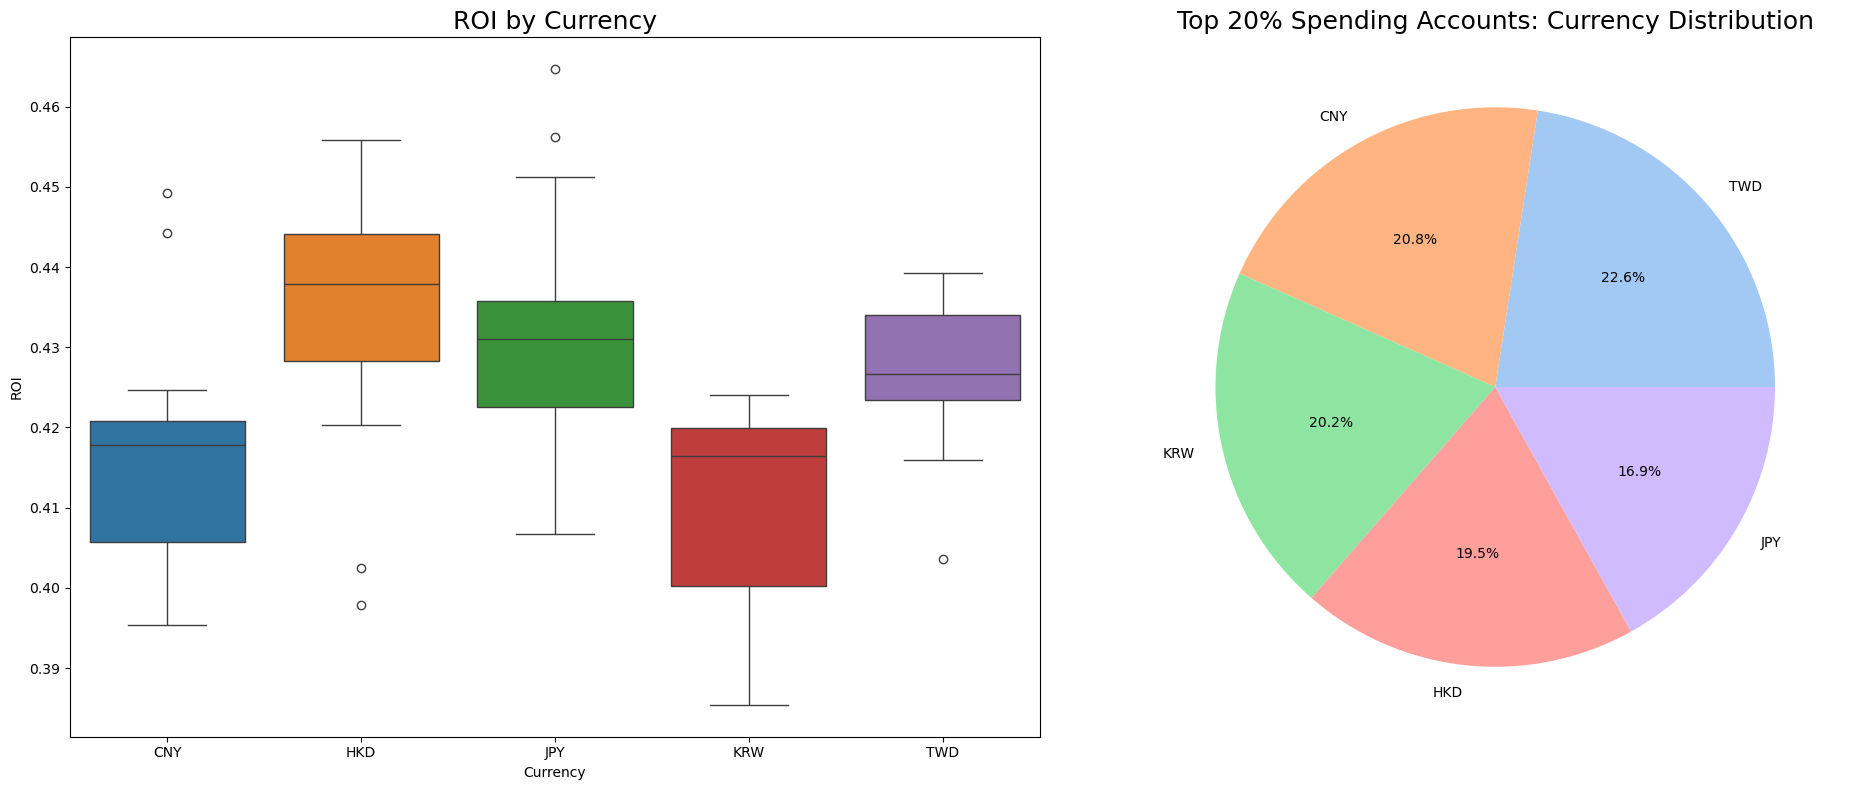

In [ ]:
df['Percentile Rank'] = df['Amount Spent'].rank(pct=True)
top_20_percent = df[df['Percentile Rank'] >= 0.8]
top_currency_distribution = top_20_percent['Currency'].value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(ax=axes[0], x='Currency', y='ROI', data=group_by_month, hue='Currency')
axes[0].set_title('ROI by Currency', fontsize=18)
axes[0].set_xlabel('Currency')
axes[0].set_ylabel('ROI')

axes[1].pie(top_currency_distribution, labels=top_currency_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title('Top 20% Spending Accounts: Currency Distribution', fontsize=18)

plt.tight_layout()
plt.show()

## ROI and Currency Differences

The ROI in the Chinese market (CNY) and the Korean market (KRW) is significantly lower compared to the other three markets (HKD, JPY, TWD). This could be due to the design of the gacha mechanics, which may result in a lower perceived return on investment for players.  
The low ROI might also negatively impact players' willingness to spend, which is reflected in the lower average spending on gacha.

## Distribution of High-Spending Players

Despite the lower ROI, the Chinese and Korean markets still account for a significant proportion of the "top 20% spending players," with shares of 20.8% and 20.2%, respectively, second only to the Taiwanese market (TWD, 22.6%).  
This indicates that both markets retain a core group of high-spending players.  
These high-spending players may place more importance on their return on investment or the perceived value of the game content. Optimizing the gacha mechanics or providing additional rewards targeted at these player groups could enhance their gaming experience.

## Recommended Actions

1. **Optimize Gacha Mechanics**:  
   Enhance the gacha mechanics for players in the Chinese and Korean markets to improve ROI. For instance, increasing the success rates of draws or providing additional rewards could help boost satisfaction for both average and high-spending players.  

2. **Analyze High-Spending Player Behavior**:  
   Further analyze the behavior of high-spending players in these two markets, such as their preferences for specific types of gacha events, and refine the corresponding content to align with their interests.

3. **Collect Direct Feedback**:  
   Gather direct feedback from players to identify other factors that may impact their gaming experience, such as the convenience of payment methods, cultural preferences, or perceptions of fairness within the game.

